### María de los Angeles Arista Huerta

*Actividad:* Fase 4 - Modelación de los datos

Cargando y explorando los datos

In [95]:
import pandas as pd 

In [96]:
df = pd.read_csv('Datos.csv')

In [97]:
df.head()

,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Día de deposito,Previsto 1 / Imprevisto 0,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,06/08/2023,Regreso a Queretaro,200.0,1500.0,150.0,6.0,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2,06/08/2023,Super en soriana,200.0,1300.0,60.0,1.0,2.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,3,06/08/2023,Sushi con LA,115.0,1100.0,90.0,4.0,3.0,2.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,4,07/08/2023,Café Starbucks Capsula,5.0,985.0,15.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,5,07/08/2023,Pedido en linea Amazon,153.0,980.0,10.0,4.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN


Seleccionando los datos

In [98]:
df = df.iloc[:,3:11]

In [99]:
df.head()

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Día de deposito,Previsto 1 / Imprevisto 0
0,200.0,1500.0,150.0,6.0,1.0,3.0,1.0,1.0
1,200.0,1300.0,60.0,1.0,2.0,2.0,0.0,1.0
2,115.0,1100.0,90.0,4.0,3.0,2.0,0.0,1.0
3,5.0,985.0,15.0,1.0,1.0,1.0,0.0,1.0
4,153.0,980.0,10.0,4.0,1.0,1.0,0.0,1.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Costo                      292 non-null    float64
 1   Presupuesto                294 non-null    float64
 2   Tiempo invertido           294 non-null    float64
 3   Tipo                       294 non-null    float64
 4   Momento                    294 non-null    float64
 5   No. de personas            294 non-null    float64
 6   Día de deposito            294 non-null    float64
 7   Previsto 1 / Imprevisto 0  294 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


Limpiando los datos

In [101]:
df.isnull().sum() 

Costo                        8
Presupuesto                  6
Tiempo invertido             6
Tipo                         6
Momento                      6
No. de personas              6
Día de deposito              6
Previsto 1 / Imprevisto 0    6
dtype: int64

In [102]:
df= df.dropna()

In [103]:
df.isnull().values.any()

False

Preparando los datos

In [104]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento',
       'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0'],
      dtype='object')

In [105]:
x = df[['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0']].values # variables independientes
y = df['Costo'].values # variable dependiente

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [108]:
y_test

array([350. , 156. ,  70. , 150. ,  18. ,   5.5, 240. , 200. ,  20. ,
        40. ,   5. ,   5.5, 100. ,   5. ,  75. ,   5. ,  28. ,   5. ,
         5. , 300. , 200. , 200. ,  85. ,  20. ,   5. ,  40. , 200. ,
        40. , 200. ,  13. ,  25. , 500. ,   5. ,  40. , 400. ,  50. ,
         5. ,   5. , 150. ,   5. ,  40. ,  25. ,  71. ,   5. ,  40. ,
         5. , 200. , 100. , 200. ,  85. ,   5. , 110. ,  85. ,  79. ,
         5.5,   5.5,  13. ,  40. ,   5. ])

Modelando los datos

In [109]:
from sklearn.linear_model import LinearRegression
model_regression = LinearRegression()

In [110]:
model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [111]:
x_labels = ['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas', 'Día de deposito', 'Previsto 1 / Imprevisto 0']
c_label = ['Coeficientes']

In [112]:
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.144499
Tiempo invertido,0.107329
Tipo,29.718972
Momento,46.417458
No. de personas,-13.162439
Día de deposito,239.160169
Previsto 1 / Imprevisto 0,6.839978


In [113]:
y_pred = model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [114]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 30)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
58,5.0,78.160472,-73.160472
39,5.0,32.354430,-27.354430
15,5.0,-23.277515,28.277515
36,5.0,20.505548,-15.505548
13,5.0,25.851995,-20.851995
50,5.0,90.876345,-85.876345
10,5.0,67.901075,-62.901075
11,5.5,-48.709261,54.209261
4,18.0,191.900441,-173.900441
23,20.0,-24.003076,44.003076


In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.021396608635489645

Visualización de los datos

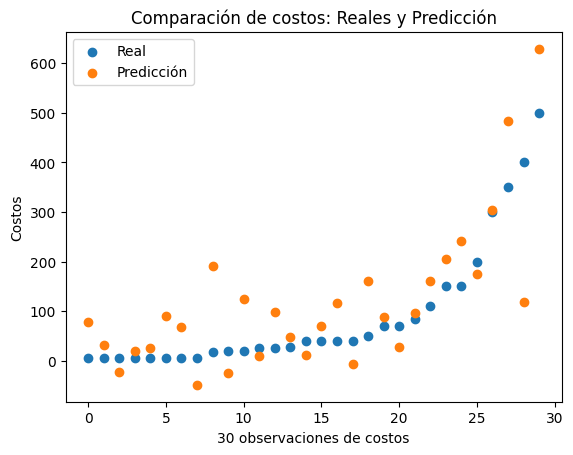

In [116]:
import matplotlib.pyplot as plt # importamos la librería pyplot que nos permitirá graficar
import numpy as np # importamos la librería numpy que nos permitirá crear un arreglo para la muestra de 30 datos

# función mágica para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(30), residuals['Real'], label = "Real")  # creamos el gráfico con la muestra de datos reales
plt.scatter(np.arange(30), residuals['Predicción'], label = "Predicción")  # creamos el gráfico con la muestra de datos de predicción
plt.title("Comparación de costos: Reales y Predicción") # indicamos el título del gráfico
plt.xlabel("30 observaciones de costos") # indicamos la etiqueta del eje de las x
plt.ylabel("Costos") # indicamos la etiqueta del eje de las y
plt.legend(loc='upper left') # indicamos la posición de la etiqueta de los datos
plt.show() # desplegamos el gráfico